In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.mode.chained_assignment = None

In [2]:
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 16
group_one = ['USA', 'IND']
fig_size = (12, 3)
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(months=12)).strftime('%Y-%m-%d')

last_day = two_days

graph_start_date = one_year

In [3]:
inp = pd.read_csv(input_file)
inp['daily_tests'] = inp['new_tests'].rolling(7).mean()
inp['daily_cases'] = inp['new_cases'].rolling(7).mean()
inp['daily_deaths'] = inp['new_deaths'].rolling(7).mean()
inp['daily_hosp'] = inp['hosp_patients'].rolling(7).mean()
inp['daily_vacc'] = inp['new_vaccinations'].rolling(7).mean()
inp['daily_deaths_change_1w'] = inp['daily_deaths'].pct_change(periods=6)*100
inp['daily_cases_change_1w'] = inp['daily_cases'].pct_change(periods=6)*100
inp['daily_hosp_change_1w'] = inp['daily_hosp'].pct_change(periods=6)*100
inp['daily_vacc_change_1w'] = inp['daily_vacc'].rolling(7).mean()

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['daily_deaths'].rolling(7).sum()/inp['daily_cases'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['daily_cases'].rolling(7).sum()/inp['daily_tests'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])

print(inp.columns)
# inp[inp['iso_code'].isin(['OWID_WRL']+group_one)].groupby('iso_code').tail(3)[[
#     'iso_code', 'date', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_vaccinations_per_hundred',
#     'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc',
#     'daily_deaths_change_1w', 'daily_cases_change_1w', 'daily_hosp_change_1w', 'daily_vacc_change_1w',
#     'cfr', 'cfr_current', 'ptr', 'ptr_current']]

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
top_n = inp[(inp['date'] == last_day) & ~inp['location'].isin(continents) & (inp['total_cases'] >= 1000000)].sort_values(
    'total_cases', ascending=False)['iso_code'].tolist()

if len(top_n) > n-1:
    top_n = top_n[0:n]

In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population',
    'total_cases', 'total_deaths', 'daily_cases', 'daily_deaths',
    'total_vaccinations', 'people_vaccinated',
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'cfr', 'daily_cases_change_1w', 'daily_deaths_change_1w']]

df['total_cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['total_deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)
df['daily_cases_%_world'] = (df['daily_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['daily_cases'])
df['daily_deaths_%_world'] = (df['daily_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['daily_deaths'])

df.sort_values('total_cases_%_world', ascending=False).set_index('iso_code')

,date,population,total_cases,total_deaths,daily_cases,daily_deaths,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,cfr,daily_cases_change_1w,daily_deaths_change_1w,total_cases_%_world,total_deaths_%_world,cases_1M_pop,deaths_1M_pop,daily_cases_%_world,daily_deaths_%_world
iso_code,,,,,,,,,,,,,,,,,,,
OWID_WRL,2021-04-22,7.794799e+09,144742651.0,3071857.0,809435.000000,12274.857143,976307845.0,535346446.0,6.87,2.88,2.13,8.128958,3.323713,100.000000,100.000000,18569,394,100.000000,100.006983
USA,2021-04-22,3.310026e+08,31929351.0,570345.0,61957.428571,705.714286,218947643.0,135791031.0,40.60,26.68,1.79,-11.611688,-1.061486,22.059394,18.566782,96462,1723,7.654404,5.749668
IND,2021-04-22,1.380004e+09,16263695.0,186920.0,281682.571429,1801.714286,132754608.0,113584269.0,8.23,1.39,1.18,49.299870,74.850964,11.236284,6.084919,11785,135,34.799900,14.679113
BRA,2021-04-22,2.125594e+08,14167973.0,383502.0,60184.571429,2579.714286,35024957.0,25340967.0,11.92,4.56,2.69,-8.271407,-9.849733,9.788388,12.484370,66654,1804,7.435380,21.017715
FRA,2021-04-22,6.814769e+07,5469674.0,102323.0,31545.857143,298.714286,18755502.0,13548016.0,19.88,7.64,1.89,-22.516229,-11.435832,3.778896,3.330982,80262,1501,3.897269,2.433716
RUS,2021-04-22,1.459345e+08,4682573.0,105328.0,8587.000000,380.142857,17218313.0,10787419.0,7.39,4.41,2.24,1.393317,6.227545,3.235102,3.428805,32086,721,1.060863,3.097139
TUR,2021-04-22,8.433907e+07,4501382.0,37329.0,59203.571429,328.285714,20728975.0,12796678.0,15.17,9.41,0.84,2.483543,23.151125,3.109921,1.215193,53372,442,7.314185,2.674643
GBR,2021-04-22,6.788600e+07,4413834.0,127597.0,2534.000000,22.714286,45012308.0,33388637.0,49.18,17.12,2.89,-5.326644,-15.425532,3.049436,4.153742,65018,1879,0.313058,0.185060
ITA,2021-04-22,6.046183e+07,3920945.0,118357.0,13541.285714,345.714286,16719109.0,11797509.0,19.51,8.14,3.02,-10.197721,-13.168281,2.708908,3.852946,64849,1957,1.672931,2.816639


<AxesSubplot:title={'center':'People Vaccinated'}, xlabel='iso_code'>

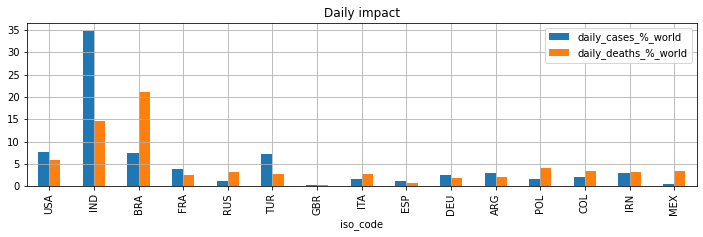

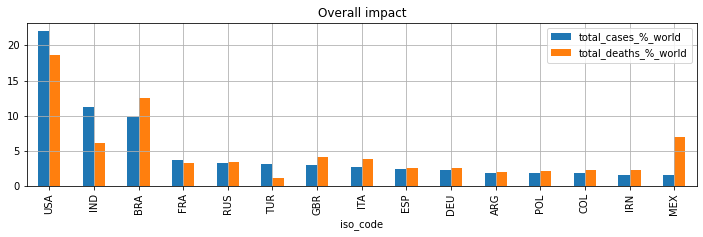

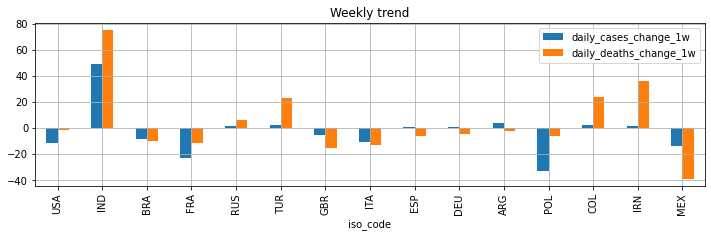

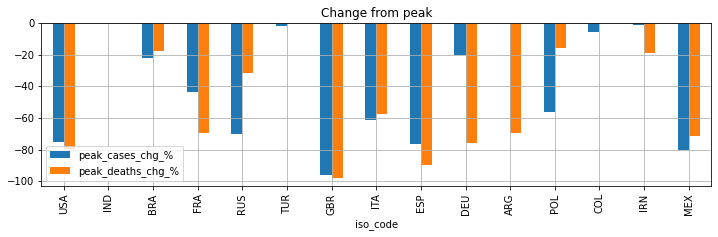

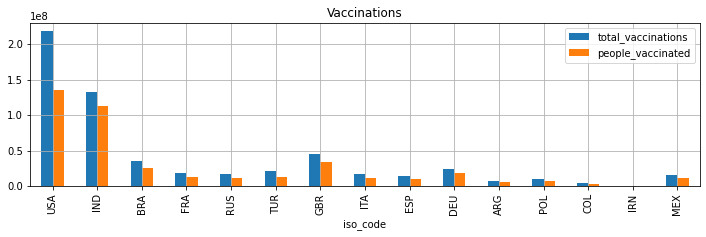

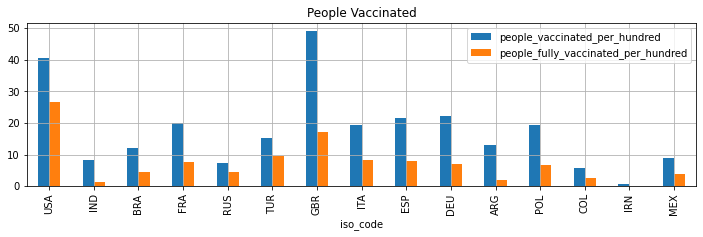

In [6]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_%_world', 'daily_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Daily impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_cases_%_world', 'total_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Overall impact')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['daily_cases_change_1w', 'daily_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Weekly trend')

df_max = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] <= last_day)].groupby('iso_code')[['daily_cases', 'daily_deaths']].max()
df_last = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)][['iso_code', 'daily_cases', 'daily_deaths']].set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'daily_cases': 'peak_cases_chg_%','daily_deaths': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Change from peak')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'people_vaccinated'],
    kind='bar', figsize=fig_size, grid=True, title='Vaccinations')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='People Vaccinated')

<AxesSubplot:title={'center':'Top daily changes from peak'}, xlabel='iso_code'>

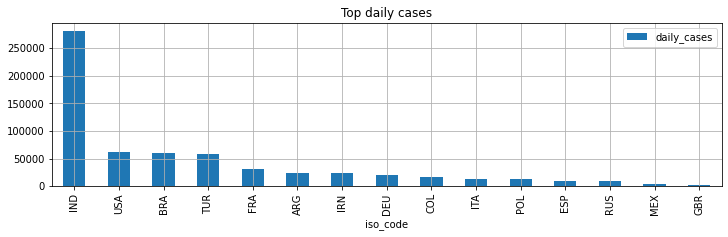

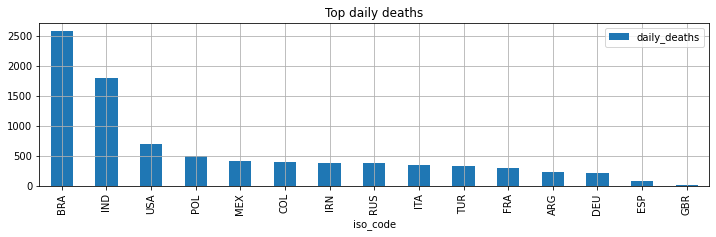

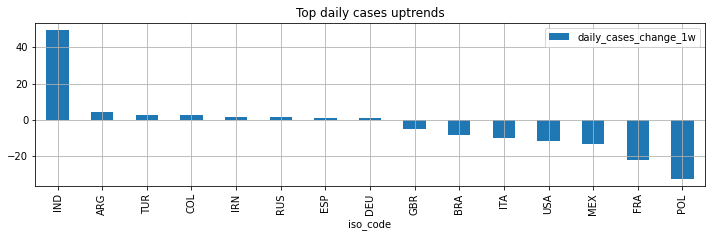

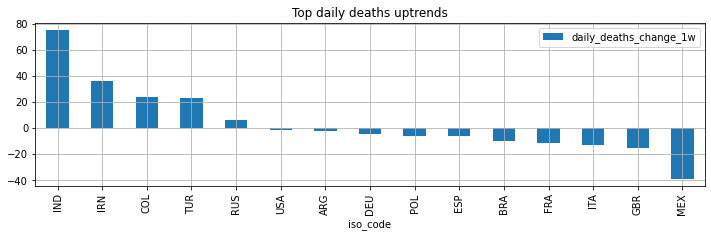

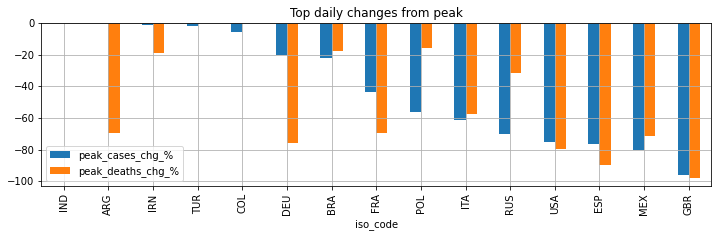

In [7]:
inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily cases uptrends')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='daily_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['daily_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top daily deaths uptrends')

df_pct_chg_max.sort_values(by=['peak_cases_chg_%', 'peak_deaths_chg_%', 'total_cases'], ascending=[False, False, False]).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Top daily changes from peak')

In [8]:
def plot_weekly_avg(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)][[
        'date', 'daily_cases', 'daily_deaths', 'daily_hosp', 'daily_vacc']].plot(
        x='date', y=['daily_cases', 'daily_deaths', 'daily_hosp'],
        secondary_y=['daily_deaths'],
        style = ['-', '-', '--', '--'], figsize=fig_size, grid=True, title=country)
    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_totals(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)][[
        'date', 'total_cases', 'total_deaths', 'people_vaccinated']].plot(
        x='date', y=['total_cases', 'total_deaths', 'people_vaccinated'], secondary_y=['total_deaths'],
        style = ['-', '-', '--'], figsize=fig_size, grid=True, title=country)

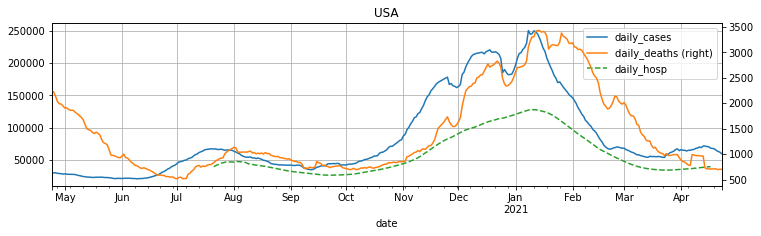

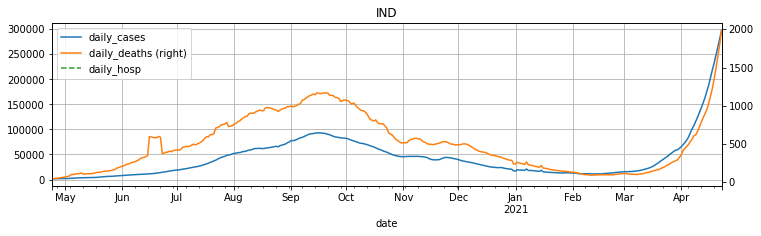

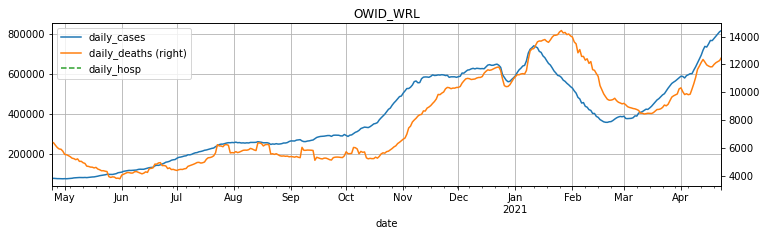

In [9]:
for country in group_one+['OWID_WRL']:
    plot_weekly_avg(inp, iso_code=country)

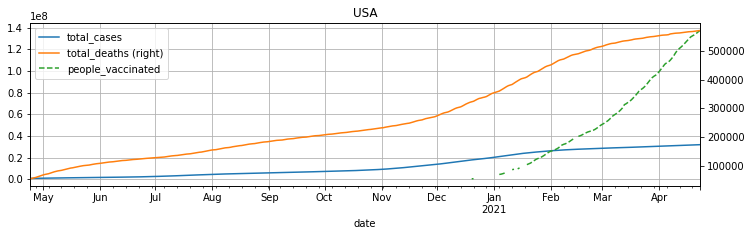

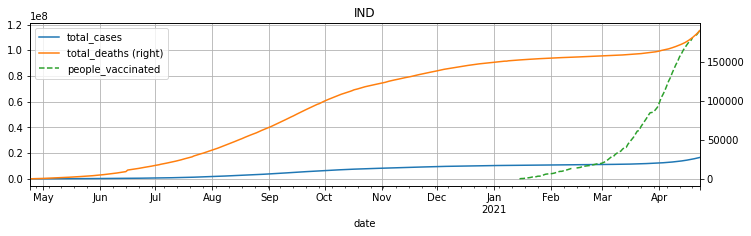

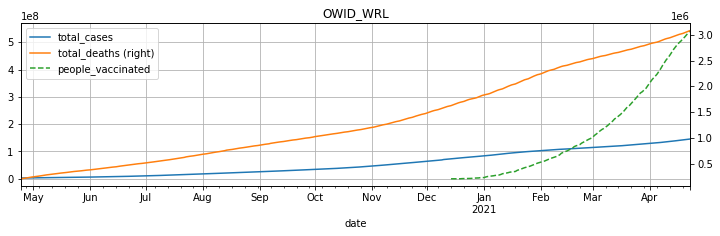

In [10]:
for country in group_one+['OWID_WRL']:
    plot_totals(inp, iso_code=country)

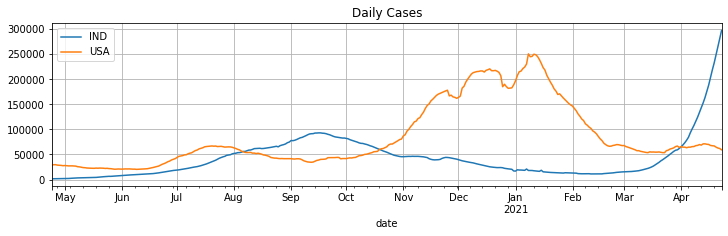

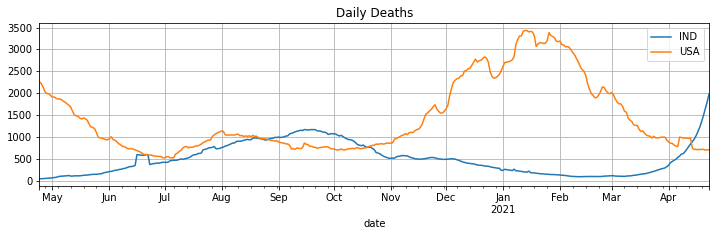

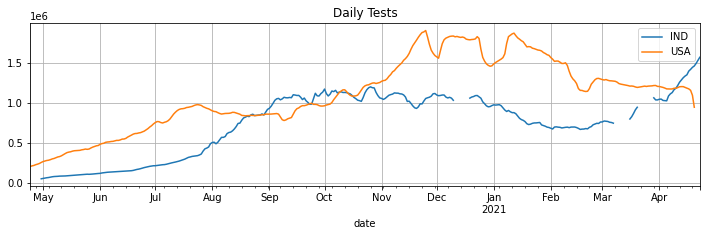

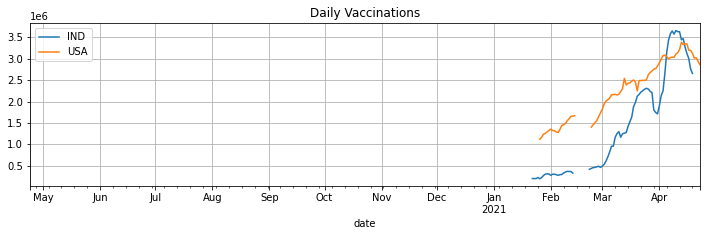

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['daily_cases'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Cases')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['daily_deaths'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Deaths')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['daily_tests'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Tests')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['daily_vacc'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='Daily Vaccinations')
axes.legend(list(sorted(group_one)))

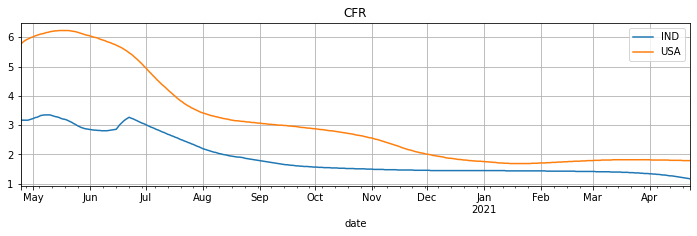

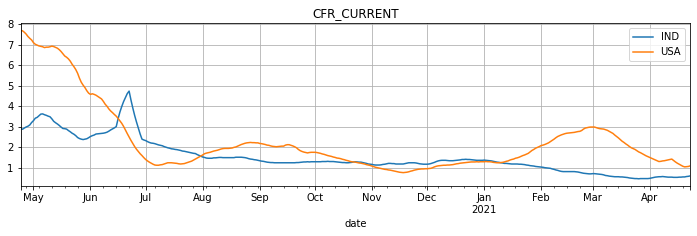

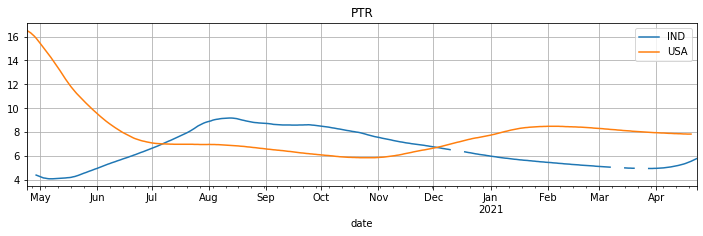

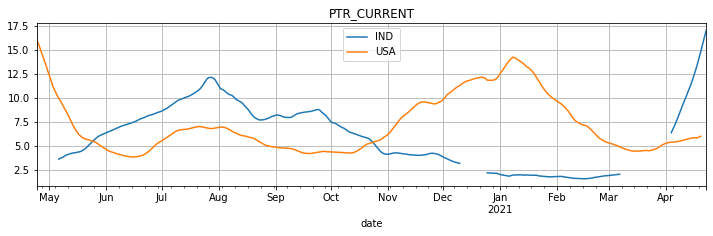

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR_CURRENT')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one)) & (inp['date'] >= graph_start_date)].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR_CURRENT')
axes.legend(list(sorted(group_one)))

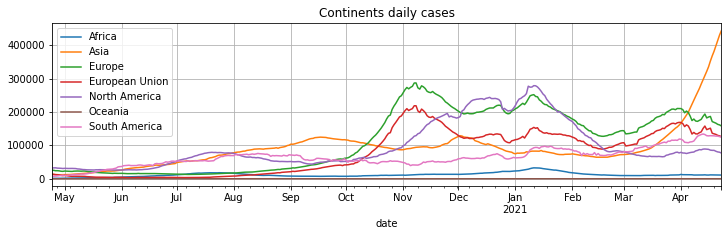

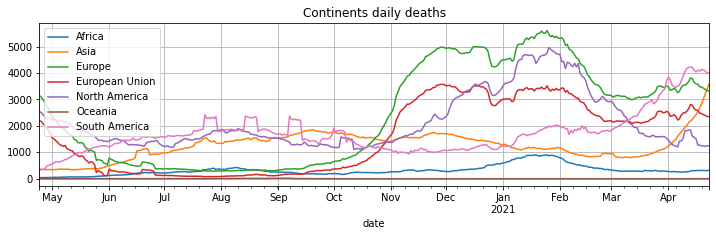

In [13]:
inp_continents = inp[inp['location'].isin(continents) & (inp['date'] >= graph_start_date)]

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='daily_cases',
        figsize=fig_size, grid=True, ax=axes, title='Continents daily cases')

axes.legend(list(sorted(continents)))

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='daily_deaths',
        figsize=fig_size, grid=True, ax=axes, title='Continents daily deaths')
    
axes.legend(list(sorted(continents)))

<AxesSubplot:title={'center':'Continents totals'}, xlabel='location'>

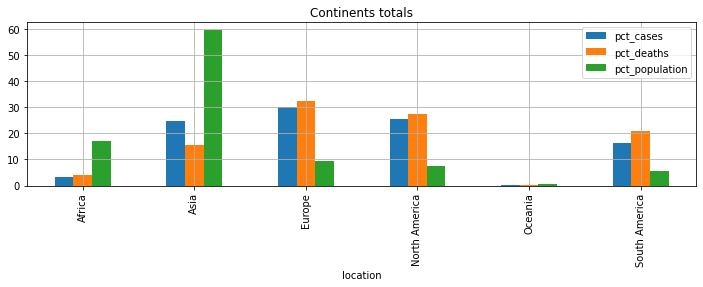

In [14]:
inp_continents_current = inp_continents[(inp_continents['location'] != 'European Union') &
                                        (inp_continents['date'] == last_day)]

inp_continents_current['pct_cases'] = inp_continents_current['total_cases']*100/inp_continents_current['total_cases'].sum()
inp_continents_current['pct_deaths'] = inp_continents_current['total_deaths']*100/inp_continents_current['total_deaths'].sum()
inp_continents_current['pct_population'] = [17.2, 59.54, 9.59, 7.6, 0.55, 5.53]

inp_continents_current.plot(
    x='location', y=['pct_cases', 'pct_deaths', 'pct_population'],
    kind='bar', figsize=fig_size, grid=True, title='Continents totals')